In [4]:
#imports 

%tensorflow_version 2.x
import tensorflow as tf 
from tensorflow import keras 

#Help-liberies 
import numpy as np
import matplotlib.pyplot as plt

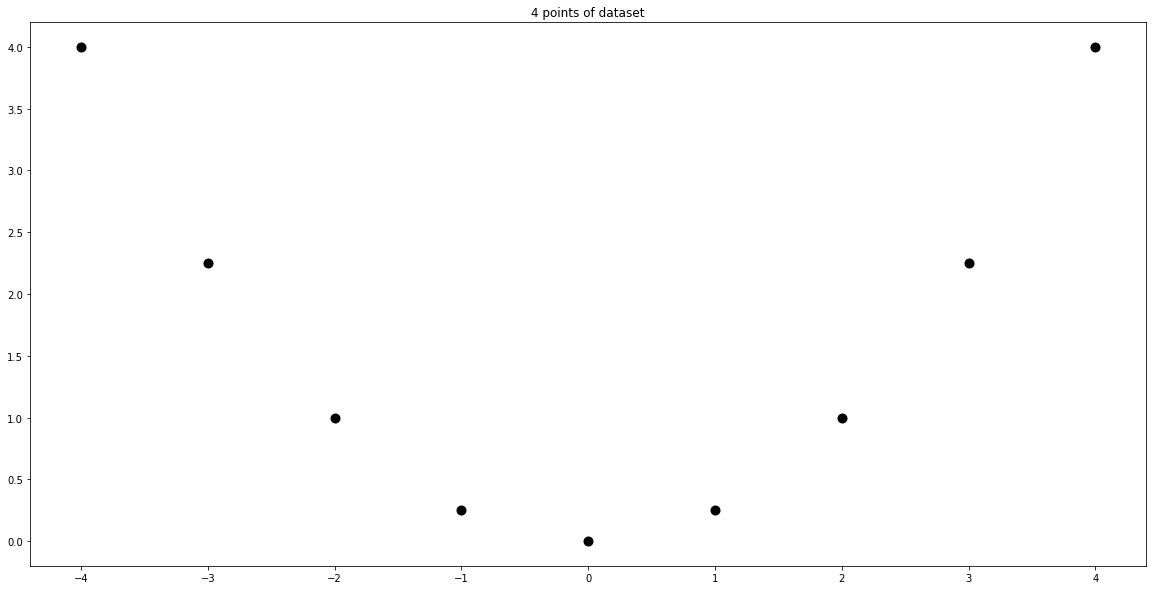

In [5]:
#creating points to interpolate
#f(x) will be the function we want to interpolate 
def f(x):
  return 0.25*x**2
  

data = np.array([i for i in range(-4,5,1)])
label = np.array([f(x) for x in data])

#lets take a look at the function
fig, ax = plt.subplots(1)
fig.set_size_inches(20,10)
ax.set_title("4 points of dataset")
ax.scatter(data,label,label="data ponts", color = 'black', linewidth =4 )


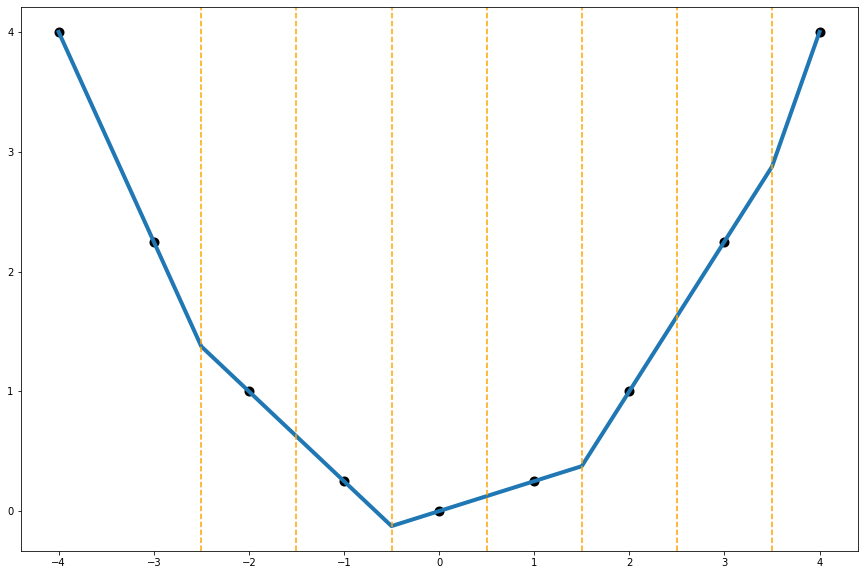

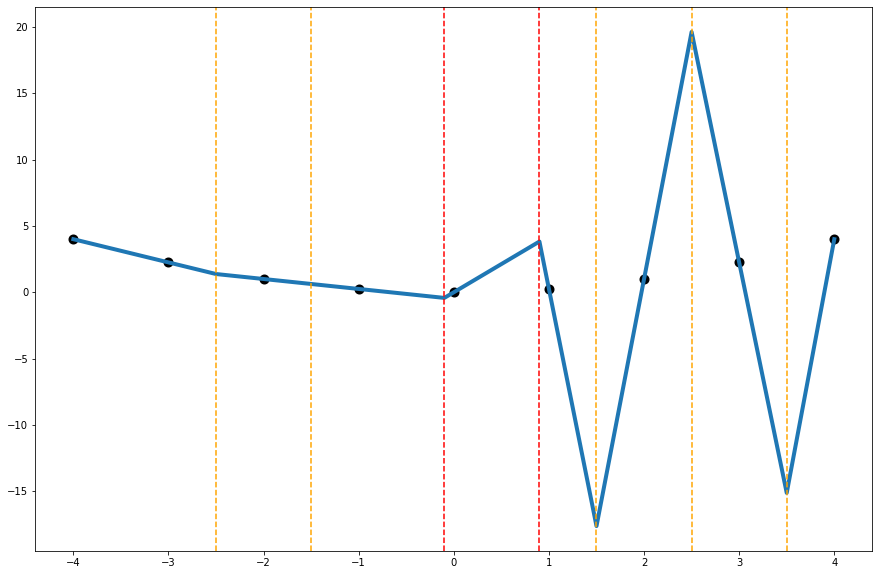

In [22]:
from sklearn.linear_model import LinearRegression

#This function gets an array of splines
#on each area between the splines, lienar regression is applied
def fit_data(splines,data,labels):
  splines = list(splines)
  splines.append(data[len(data)-1])
  splines.append(data[0])
  splines.sort()
  linear_functions = []
  extra_x = data[0]
  exrta_y = label[0]
  m = 0 
  c = 0 
  help = 0

  for i in range(len(splines)-1):
    extra_x = splines[i]
    extra_y = m*splines[i] + c
    data_to_fit = [x for x in data if splines[i] <= x <= splines[i+1]]
    label_to_fit = list(label[help:help + len(data_to_fit)])
    help = help+len(data_to_fit) 
    weights = [1 for i in range(len(data_to_fit))]

    if i > 0:
      data_to_fit.append(extra_x)
      label_to_fit.append(extra_y)
      weights.append(9999999)

    model = LinearRegression()
    model.fit(np.array(data_to_fit).reshape((-1,1)),label_to_fit,weights)
    m = model.coef_[0]
    c = model.intercept_
    linear_functions.append([splines[i],m*splines[i]+c])

  last = len(splines) - 1
  linear_functions.append([splines[last],m*splines[last]+c])
  return np.array(linear_functions)


#create a good aproximation
splines = [-2.5,-1.5,-.5,.5,1.5,2.5,3.5]
function = fit_data(splines,data,label)


#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(15,10)
ax.plot(function[:,0],function[:,1],linewidth =4, label = 'model function')
ax.scatter(data,label,label="data ponts", color = 'black', linewidth =4 ) 
for s in splines:
  ax.axvline(x = s, ls = '--', label = 'splines', color = 'orange')


#create a bad aproximation
splines2 = [-2.5,-1.5,-.1,.9,1.5,2.5,3.5]
function2 = fit_data(splines2,data,label)


#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(15,10)
ax.plot(function2[:,0],function2[:,1],linewidth =4, label = 'model function')
ax.scatter(data,label,label="data ponts", color = 'black', linewidth =4 ) 
for i in range(len(splines2)):
  if splines2[i] != splines[i]:
    ax.axvline(x = splines2[i], ls = '--', label = 'splines', color = 'red')
  else:  
    ax.axvline(x = splines2[i], ls = '--', label = 'splines', color = 'orange')




In [5]:
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects

#knots = tf.constant([-3.5,-2.5,-1.5, -0.01,0.5,1.5,2.5,3.5], dtype = tf.float32)
knots = tf.constant(np.linspace(-5,5,1000), dtype = tf.float32)

def myactivation(x):
  return 0.5*(abs(x - knots))

get_custom_objects().update({'custom_activation': Activation(myactivation)})  


def train_models( data, labels):
  predictions = []

  model = keras.Sequential([
      keras.Input(shape=(1,)),
      keras.layers.Dense(units=len(knots), bias_constraint=tf.keras.constraints.MinMaxNorm(
min_value=0.0, max_value=0.0, rate=1.0, axis=0), activation = 'custom_activation'),
      keras.layers.Dense(units=1, activation='linear',trainable=False),
    ])
  model.compile(
      optimizer=keras.optimizers.Adam(lr = 0.01),
      loss=keras.losses.MeanSquaredError(),
      metrics=['categorical_accuracy']
    )
  
  loss = 100
  epoch_counter =  0
  #training the model until a certain loss is reached or 10000 epochs are reached
  while(loss > 0.0001 and epoch_counter < 2500000):
    history = model.fit(data,labels,10)
    epoch_counter = epoch_counter + 10
    train_loss, train_acc = history.history.values()
    loss = train_loss[len(train_loss) -1]
    if loss < 0.000001 and epoch_counter > 5000:
      break

  pred_x= np.linspace(min(data),max(data),100)
  pred_y= [model.predict(p)[0] for p in [[x] for x in pred_x]]
  predictions.append([np.array(pred_x),np.array(pred_y)])

  return predictions

In [6]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

def plot_regression(predictions,data, labels):

  fig, ax = plt.subplots(1)
  fig.set_size_inches(20,20)
  ax.scatter(data,label,label="data ponts", color = 'black', linewidth =4 ) 
  ax.plot(np.array(predictions[0][0]),np.array(predictions[0][1]))
  ax.legend()
predictions = train_models(data,label) 
plot_regression(predictions,data,label)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 7ms/step - loss: 1.0667 - categorical_accuracy: 1.0000


KeyboardInterrupt: ignored

In [ ]:
)